<a href="https://colab.research.google.com/github/NinaAbeyratne/Analysing_HCHO_gas_in_Sri_Lanka/blob/main/DE_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Define column names
column_names = ['HCHO_reading', 'Location', 'current_Date', 'next_Date']

dataset1 = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/col_mat_nuw_output.csv', names=column_names)
dataset2 = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/kan_output.csv', names=column_names)
dataset3 = pd.read_csv('/content/drive/MyDrive/DE CW/Datasets/mon_kur_jaf_output.csv', names=column_names)

In [41]:
dataset1

,HCHO_reading,Location,current_Date,next_Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Nuwara Eliya Proper,2023-12-27,2023-12-28
5474,NaN,Nuwara Eliya Proper,2023-12-28,2023-12-29
5475,NaN,Nuwara Eliya Proper,2023-12-29,2023-12-30
5476,NaN,Nuwara Eliya Proper,2023-12-30,2023-12-31


In [42]:
df_dataset1 = pd.DataFrame(dataset1)
df_dataset2 = pd.DataFrame(dataset2)
df_dataset3 = pd.DataFrame(dataset3)

In [43]:
# Check for missing data
missing_data = df_dataset1.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 1:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 1:
HCHO_reading    2419
dtype: int64


In [44]:
# Check for missing data
missing_data = df_dataset2.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 2:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 2:
HCHO_reading    793
dtype: int64


In [45]:
# Check for missing data
missing_data = df_dataset3.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 3:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 3:
HCHO_reading    1652
dtype: int64


In [46]:
# columns with ?
df_dataset3.isin(["?"]).sum()

HCHO_reading    0
Location        0
current_Date    0
next_Date       0
dtype: int64

In [47]:
# columns with ?
df_dataset2.isin(["?"]).sum()

HCHO_reading    0
Location        0
current_Date    0
next_Date       0
dtype: int64

In [48]:
# columns with ?
df_dataset1.isin(["?"]).sum()

HCHO_reading    0
Location        0
current_Date    0
next_Date       0
dtype: int64

In [49]:
# Check for duplicates
duplicates = df_dataset1.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [50]:
# Check for duplicates
duplicates = df_dataset2.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [51]:
# Check for duplicates
duplicates = df_dataset3.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [52]:
# forward fill
df_dataset1.fillna(method='ffill', inplace=True)

In [53]:
# Check for missing data
missing_data = df_dataset1.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 1:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 1:
Series([], dtype: int64)


In [54]:
# Check for duplicates
duplicates = df_dataset1.duplicated().sum()

# Number of duplicate rows
print("Number of Duplicate Rows:", duplicates)

Number of Duplicate Rows: 0


In [55]:
# forward fill
df_dataset2.fillna(method='ffill', inplace=True)

In [56]:
# forward fill
df_dataset3.fillna(method='ffill', inplace=True)

In [57]:
# Check for missing data
missing_data = df_dataset2.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 2:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 2:
Series([], dtype: int64)


In [58]:
# Check for missing data
missing_data = df_dataset3.isnull().sum()

# Display columns with missing data
print("Columns with Missing Data in Dataset 3:")
print(missing_data[missing_data > 0])

Columns with Missing Data in Dataset 3:
HCHO_reading    1
dtype: int64


In [62]:
# Combine the datasets
combined_dataset = pd.concat([dataset1, dataset2, dataset3], ignore_index=True)

# Display the combined dataset
combined_dataset

,HCHO_reading,Location,current_Date,next_Date
0,1.969834e-04,Colombo Proper,2019-01-01,2019-01-02
1,2.625522e-04,Colombo Proper,2019-01-02,2019-01-03
2,9.852119e-05,Colombo Proper,2019-01-03,2019-01-04
3,2.099321e-04,Colombo Proper,2019-01-04,2019-01-05
4,1.785337e-04,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
12777,-7.696313e-08,Jaffna Proper,2023-12-27,2023-12-28
12778,5.139770e-05,Jaffna Proper,2023-12-28,2023-12-29
12779,1.267235e-04,Jaffna Proper,2023-12-29,2023-12-30
12780,1.166590e-04,Jaffna Proper,2023-12-30,2023-12-31


In [65]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12782 entries, 0 to 12781
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HCHO_reading  12781 non-null  float64
 1   Location      12782 non-null  object 
 2   current_Date  12782 non-null  object 
 3   next_Date     12782 non-null  object 
dtypes: float64(1), object(3)
memory usage: 399.6+ KB


In [67]:
# Drop the 'next_Date' column
combined_dataset.drop(columns=['next_Date'], inplace=True)

In [68]:
combined_dataset

,HCHO_reading,Location,current_Date
0,1.969834e-04,Colombo Proper,2019-01-01
1,2.625522e-04,Colombo Proper,2019-01-02
2,9.852119e-05,Colombo Proper,2019-01-03
3,2.099321e-04,Colombo Proper,2019-01-04
4,1.785337e-04,Colombo Proper,2019-01-05
...,...,...,...
12777,-7.696313e-08,Jaffna Proper,2023-12-27
12778,5.139770e-05,Jaffna Proper,2023-12-28
12779,1.267235e-04,Jaffna Proper,2023-12-29
12780,1.166590e-04,Jaffna Proper,2023-12-30


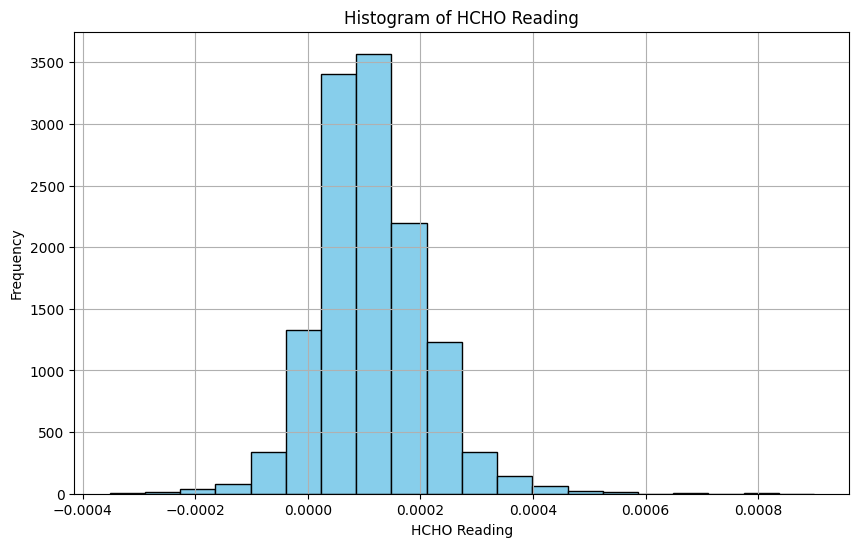

In [72]:
# Visualize the data for the 'HCHO_reading' column
plt.figure(figsize=(10, 6))
plt.hist(combined_dataset['HCHO_reading'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of HCHO Reading')
plt.xlabel('HCHO Reading')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [71]:
combined_dataset.describe()

,HCHO_reading
count,12781.000000
mean,0.000113
std,0.000096
min,-0.000352
25%,0.000053
50%,0.000107
75%,0.000168
max,0.000900


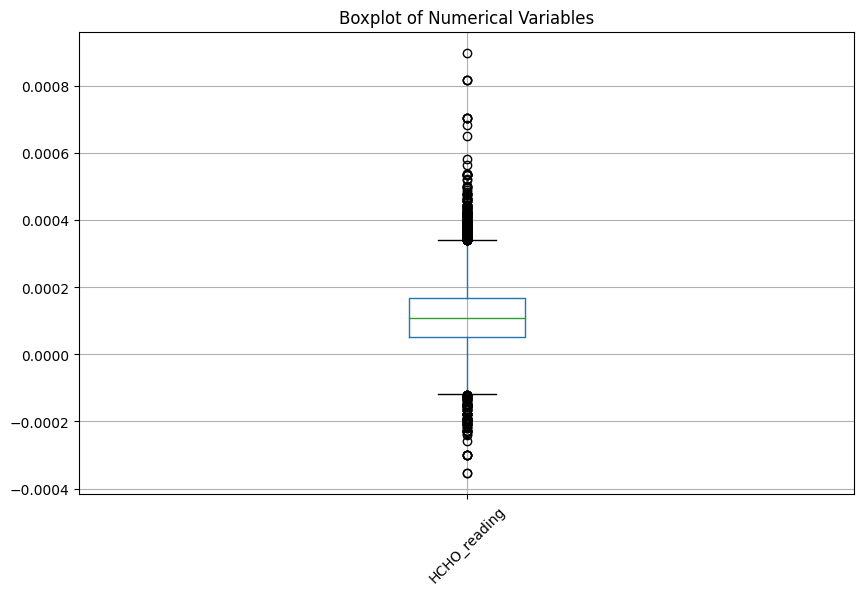

In [79]:
# Boxplot for HCHO reading
plt.figure(figsize=(10, 6))
combined_dataset.boxplot()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

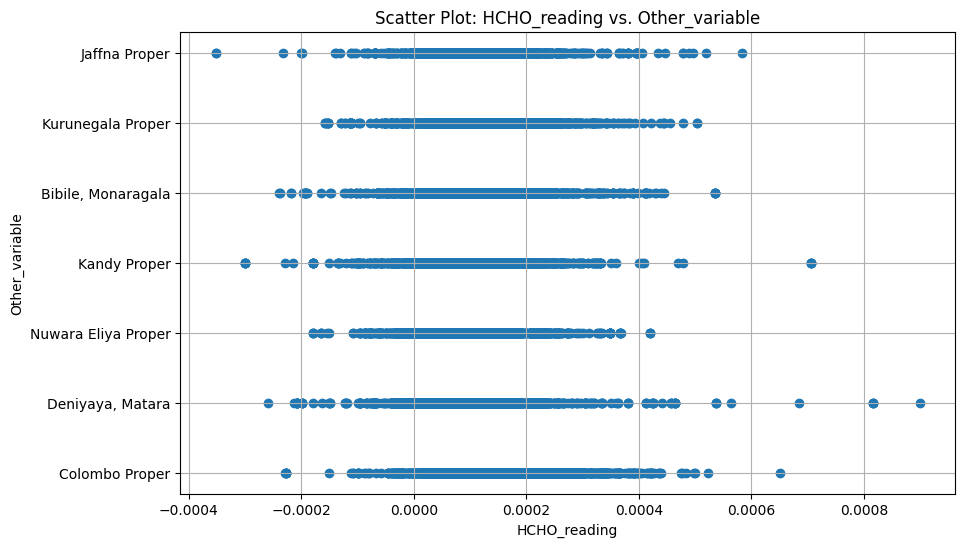

In [74]:
# Scatter plots HCHO_reading vs. Location
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset['HCHO_reading'], combined_dataset['Location'])
plt.title('Scatter Plot: HCHO_reading vs. Other_variable')
plt.xlabel('HCHO_reading')
plt.ylabel('Other_variable')
plt.grid(True)
plt.show()

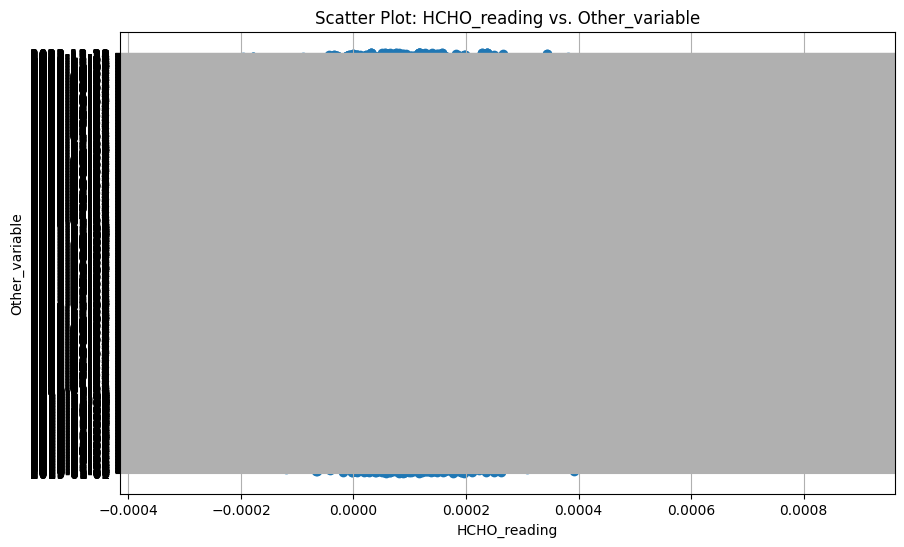

In [76]:
# Scatter plots HCHO_reading vs. current_Date
plt.figure(figsize=(10, 6))
plt.scatter(combined_dataset['HCHO_reading'], combined_dataset['current_Date'])
plt.title('Scatter Plot: HCHO_reading vs. Other_variable')
plt.xlabel('HCHO_reading')
plt.ylabel('Other_variable')
plt.grid(True)
plt.show()